# Lab 02: Data Visualization, Exploration, and a Simple ANN with PyTorch

## Overview
In this lab, we will explore data visualization using **Matplotlib** and **Seaborn**, perform data exploration and conversion, and create a simple artificial neural network (ANN) using **PyTorch**. We will use a dataset of housing prices as our example.

### Dataset Columns:
- **price**: Price of the house
- **area**: Area of the house (in square feet)
- **bedrooms**: Number of bedrooms
- **bathrooms**: Number of bathrooms
- **stories**: Number of stories
- **mainroad**: Whether the house is near a main road (yes/no)
- **guestroom**: Whether the house has a guest room (yes/no)
- **basement**: Whether the house has a basement (yes/no)
- **hotwaterheating**: Whether the house has hot water heating (yes/no)
- **airconditioning**: Whether the house has air conditioning (yes/no)
- **parking**: Number of parking spaces
- **prefarea**: Whether the house is in a preferred area (yes/no)
- **furnishingstatus**: Furnishing status of the house (furnished/semi-furnished/unfurnished)


### Step 1: Install and Import Libraries

In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install --upgrade pandas
!{sys.executable} -m pip install --upgrade "numpy<2.0"
!{sys.executable} -m pip install --upgrade seaborn
!{sys.executable} -m pip install --upgrade matplotlib
!{sys.executable} -m pip install --upgrade scikit-learn
# warning: pytorch uses more than 6GB of storage space
!{sys.executable} -m pip install torch --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## load dataset

In [3]:
data = pd.read_csv('data/Housing.csv')

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# data.drop(['hotwaterheating','airconditioning'],axis=1,inplace=True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Step 2: Plotting with Seaborn
Create visualizations to analyze relationships and distributions in the data.


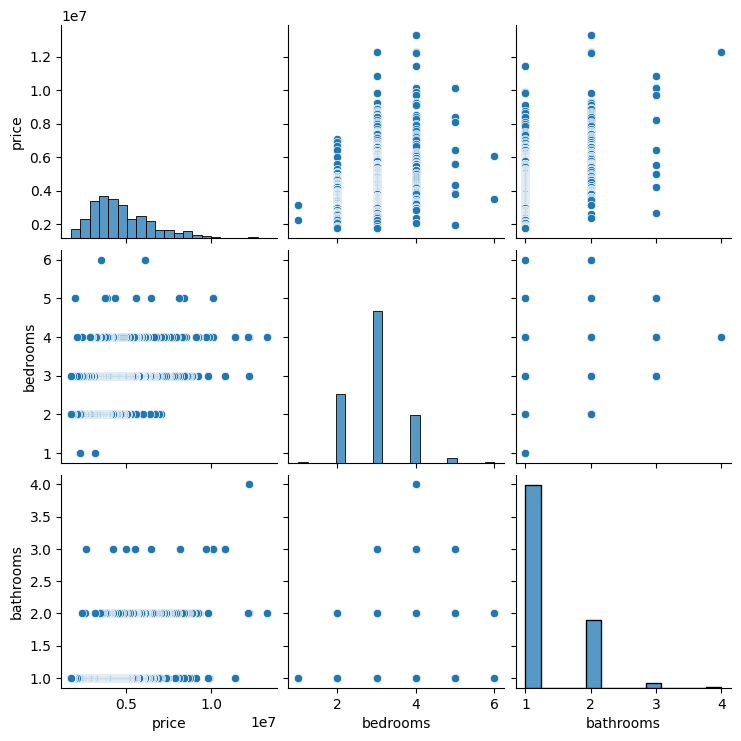

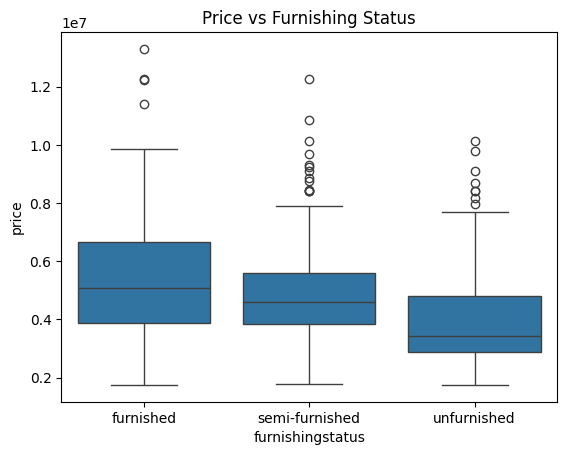

In [5]:
# Pairplot to visualize relationships
sns.pairplot(data, vars=['price', 'bedrooms', 'bathrooms'])
plt.show()

# Boxplot for categorical features
sns.boxplot(x='furnishingstatus', y='price', data=data)
plt.title('Price vs Furnishing Status')
plt.show()

### Step 3: Plotting with Matplotlib


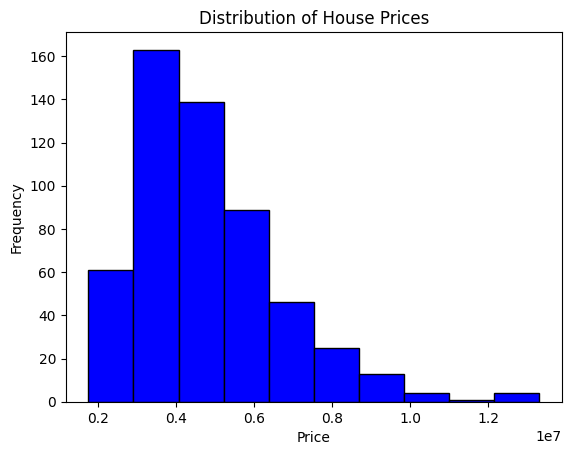

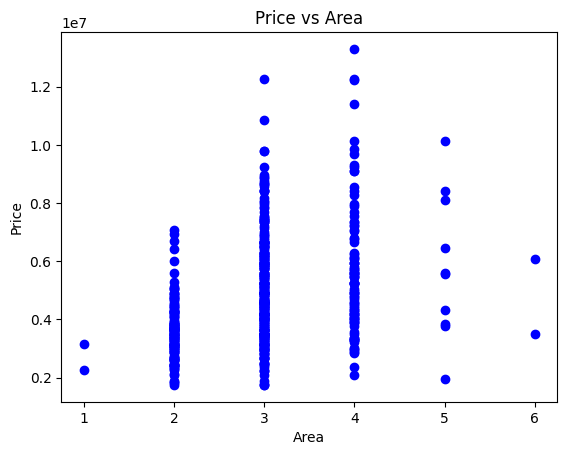

In [6]:
# Histogram for house prices
plt.hist(data['price'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for price vs bedrooms
plt.scatter(data['bedrooms'], data['price'], color='blue')
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Part 2: Data Exploration and Conversion

### Step 1: Exploring Data

In [7]:
# Basic information about the dataset
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
# Statistical summary
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
# list number of unique values in each column

for i in data.columns:
    print("Column name {} and unique values are {}".format(i,len(data[i].unique())))


Column name price and unique values are 219
Column name area and unique values are 284
Column name bedrooms and unique values are 6
Column name bathrooms and unique values are 4
Column name stories and unique values are 4
Column name mainroad and unique values are 2
Column name guestroom and unique values are 2
Column name basement and unique values are 2
Column name hotwaterheating and unique values are 2
Column name airconditioning and unique values are 2
Column name parking and unique values are 4
Column name prefarea and unique values are 2
Column name furnishingstatus and unique values are 3


### Step 2: Encoding Categorical Data


In [10]:
# Encode categorical variables
# list of categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O'] # shortcut that gets all columns with object datatype (meaning non numerical)
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)



# encode categorical variables to numerical values
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in categorical:
    lbl_encoders[feature]=LabelEncoder()
    data[feature]=lbl_encoders[feature].fit_transform(data[feature])


# Display the transformed dataset
display(data.head())

There are 7 categorical variables

The categorical variables are :

 ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<Axes: >

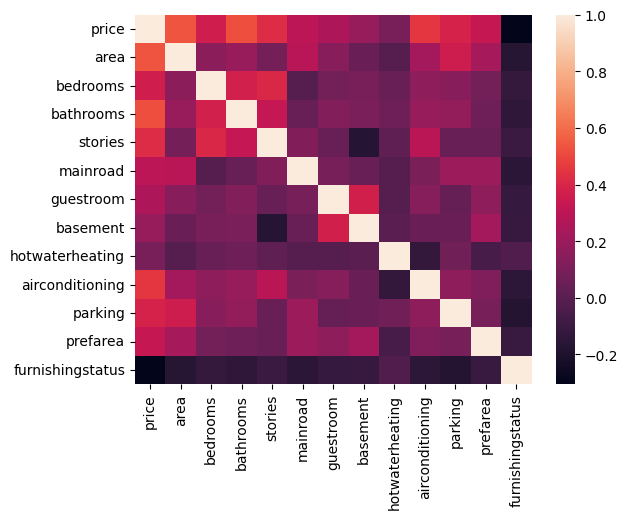

In [11]:
# you can now calculate the correlation matrix from the data
corr = data.corr()
sns.heatmap(corr, annot=False)

## Part 3: Building a Simple ANN with PyTorch

### Step 0: Import PyTorch

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F



### Step 1: Convert dataset

In [13]:

# Convert data to PyTorch tensors
cat_features=np.stack(data[categorical].values, 1)
cat_features
# swap dimensions of the tensor
cat_features = np.swapaxes(cat_features, 0, 1)
# we split the categorical and numerical columns into separate tensors for input to the neural network
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features



tensor([[1, 0, 0,  ..., 1, 1, 0],
        [1, 0, 0,  ..., 1, 0, 0],
        [1, 0, 1,  ..., 0, 1, 1],
        ...,
        [1, 0, 0,  ..., 0, 0, 2],
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 2]])

In [14]:
### Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
# invert dimensions of the numpy array

cat_features


/tmp/ipykernel_15017/355738571.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cat_features=torch.tensor(cat_features,dtype=torch.int64)


tensor([[1, 0, 0,  ..., 1, 1, 0],
        [1, 0, 0,  ..., 1, 0, 0],
        [1, 0, 1,  ..., 0, 1, 1],
        ...,
        [1, 0, 0,  ..., 0, 0, 2],
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 2]])

In [15]:
#### create continuous variable
cont_features=[]
for i in data.columns:
    if i in categorical+['price']:
        pass
    else:
        cont_features.append(i)
cont_features

['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [16]:
len(data['furnishingstatus'].unique())

3

In [ ]:
### Stacking continuous variable to a tensor
cont_values=np.stack([data[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
print(cont_values)
cont_values.dtype


tensor([[7.4200e+03, 4.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00],
        [8.9600e+03, 4.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00],
        [9.9600e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00],
        ...,
        [3.6200e+03, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00],
        [2.9100e+03, 3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00],
        [3.8500e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00]])


torch.float32

In [18]:
### Dependent Feature 
y=torch.tensor(data['price'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[13300000.],
        [12250000.],
        [12250000.],
        [12215000.],
        [11410000.],
        [10850000.],
        [10150000.],
        [10150000.],
        [ 9870000.],
        [ 9800000.],
        [ 9800000.],
        [ 9681000.],
        [ 9310000.],
        [ 9240000.],
        [ 9240000.],
        [ 9100000.],
        [ 9100000.],
        [ 8960000.],
        [ 8890000.],
        [ 8855000.],
        [ 8750000.],
        [ 8680000.],
        [ 8645000.],
        [ 8645000.],
        [ 8575000.],
        [ 8540000.],
        [ 8463000.],
        [ 8400000.],
        [ 8400000.],
        [ 8400000.],
        [ 8400000.],
        [ 8400000.],
        [ 8295000.],
        [ 8190000.],
        [ 8120000.],
        [ 8080940.],
        [ 8043000.],
        [ 7980000.],
        [ 7962500.],
        [ 7910000.],
        [ 7875000.],
        [ 7840000.],
        [ 7700000.],
        [ 7700000.],
        [ 7560000.],
        [ 7560000.],
        [ 7525000.],
        [ 749

In [19]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([545, 7]), torch.Size([545, 5]), torch.Size([545, 1]))

In [20]:
#### Embedding Size For Categorical columns
cat_dims=[len(data[col].unique()) for col in categorical]
cat_dims

[2, 2, 2, 2, 2, 2, 3]

In [21]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]
embedding_dim

[(2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (3, 2)]

In [22]:
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0-5): 6 x Embedding(2, 1)
  (6): Embedding(3, 2)
)

In [23]:
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))
embedding_val


[tensor([[ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],
         [ 0.0631],


In [24]:
z = torch.cat(embedding_val, 1)
z

tensor([[ 0.0631, -0.8166,  1.1199,  ..., -1.1403,  0.5444, -0.1357],
        [ 0.0631, -0.8166,  1.1199,  ...,  1.1333,  0.5444, -0.1357],
        [ 0.0631, -0.8166,  1.7517,  ..., -1.1403, -2.4448, -0.0481],
        ...,
        [ 0.0631, -0.8166,  1.1199,  ...,  1.1333, -2.0838, -0.4213],
        [-1.4612, -0.8166,  1.1199,  ...,  1.1333,  0.5444, -0.1357],
        [ 0.0631, -0.8166,  1.1199,  ...,  1.1333, -2.0838, -0.4213]],
       grad_fn=<CatBackward0>)

In [25]:
#### Implement dropupout
droput=nn.Dropout(.4)

In [26]:


final_embed=droput(z)
final_embed



tensor([[ 0.1052, -1.3610,  1.8664,  ..., -1.9005,  0.0000, -0.0000],
        [ 0.1052, -1.3610,  1.8664,  ...,  1.8888,  0.0000, -0.2262],
        [ 0.1052, -1.3610,  0.0000,  ..., -0.0000, -4.0747, -0.0802],
        ...,
        [ 0.1052, -0.0000,  1.8664,  ...,  0.0000, -0.0000, -0.7022],
        [-2.4353, -1.3610,  1.8664,  ...,  0.0000,  0.9073, -0.2262],
        [ 0.1052, -1.3610,  0.0000,  ...,  0.0000, -3.4731, -0.7022]],
       grad_fn=<MulBackward0>)

### Step 2: Define the ANN Model
In this model we use linear layers of input shape to 16 then 8 to 1 to the output value.

In [27]:
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x


In [28]:
len(cont_values)

545

### Step 3: Split the data

In [29]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

train_categorical, test_categorical, train_cont, test_cont, y_train, y_test = train_test_split(cat_features, cont_values, y, test_size=0.2, random_state=42)
train_categorical.shape, test_categorical.shape, train_cont.shape, test_cont.shape, y_train.shape, y_test.shape


(torch.Size([436, 7]),
 torch.Size([109, 7]),
 torch.Size([436, 5]),
 torch.Size([109, 5]),
 torch.Size([436, 1]),
 torch.Size([109, 1]))

### Step 4: Train the Model

Bonus challenge: try to get a lower loss by editing the model or training step


In [44]:
# Define loss function and optimizer
loss_function=nn.MSELoss()
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

import time
# Training loop
epochs=50000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10000==0:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
# Epoch number: 50000 and the loss : 1079380.625 834115 878800


Epoch number: 10000 and the loss : 4114849.25
Epoch number: 20000 and the loss : 2208433.5
Epoch number: 30000 and the loss : 862733.5625
Epoch number: 40000 and the loss : 837623.25
Epoch number: 50000 and the loss : 867955.0625


### Step 5: Evaluate the Model


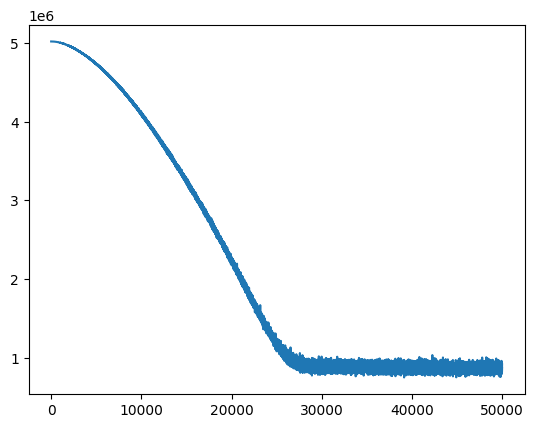

In [45]:
import matplotlib.pyplot as plt
# convert losses to numpy array
final_losses_numpy = []
for i in range(epochs):
    final_losses_numpy.append(final_losses[i].detach().numpy())
epoch_list = list(range(epochs))
plt.plot( final_losses_numpy)


In [46]:
#### Validate the Test Data
with torch.no_grad():
    print('Test Data')
    print(test_categorical)
    y_pred=model(test_categorical,test_cont)
    print(y_pred)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

Test Data
tensor([[0, 0, 1, 0, 0, 0, 2],
        [1, 0, 0, 0, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 2],
        [1, 0, 0, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 2],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 2],
        [0, 0, 0, 0, 1, 0, 2],
        [0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 2],
        [0, 1, 0, 0, 0, 0, 2],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 2],
        [1, 0, 1, 0, 0, 0, 2],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 1, 2],
        [1, 1, 1, 0, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 2],
        [1, 1, 1, 0, 0, 1, 2],
        [1, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 0, 2],
        [1, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 2]

In [47]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])
data_predicted

,Prediction
0,5489335.50
1,6710332.50
2,3102028.50
3,4147600.75
4,3209364.75
...,...
104,6219624.50
105,6811411.50
106,8292641.00
107,8476781.00


In [48]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,4060000.0,5489335.50,-1429335.50
1,6650000.0,6710332.50,-60332.50
2,3710000.0,3102028.50,607971.50
3,6440000.0,4147600.75,2292399.25
4,2800000.0,3209364.75,-409364.75
